## Analisando a Atividade Policial

Esta analise foi realizada durante a realização do curso _[Analyzing Police Activity with pandas](https://learn.datacamp.com/courses/analyzing-police-activity-with-pandas)_ fornecido pelo DataCamp.

O conjunto de dados usado é fornecido pelo Stanford Open Policing Project e representa as paradas de trânsito dos policiais nos Estados Unidos no Estado de Rhode Island durante os anos de 2005 - 2015. Cada linha neste conjunto de dados representa a parada realizada por algum policial de algum condutor de veículo.

A análise dos dados é dividida então em três etapas:

1. Preparando os dados para a análise;
2. Explorando a relação entre gênero e policiamento; e
3. Análise de dados exploratórios visuais.

A dinâmica da análise dos dados será feita através de perguntas e respostas. Sendo assim, diversas perguntas serão feitas e logo em seguida serão respondidas para que a análise vá acontecendo. 

In [2]:
import pandas as pd

# Armazenando os dados no DataFrame chamado ri 
ri = pd.read_csv('datasets/police.data')
ri.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


### 1. Preparando os Dados para Análise

Antes de iniciar a análise, é fundamental examinar e limpar o conjunto de dados, para tornar o trabalho com ele um processo mais eficiente. Neste conjunto de dados, é necessário corrigir os tipos de dados, manipular valores ausentes e descartar colunas e linhas enquanto se aprende sobre o conjunto de dados do _Stanford Open Policing Project_.

In [3]:
# Mostrando o número de valores NaN em cada coluna do DataFrame
print("Número de valores NaN em cada coluna:\n" + str(ri.isnull().sum()))

# Mostrando o tamanho do DataFrame (linhas, colunas)
print("\nShape: " + str(ri.shape))

Número de valores NaN em cada coluna:
state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

Shape: (91741, 15)


Com esta análise, podemos notar que a coluna `county_name` sempre possui valor NaN. Além disso, este conjunto de dados está restrito a apenas um estado dos EUA, portanto a coluna `state` não será útil. Sendo assim, iremos remover estas duas colunas do DataFrame.

In [4]:
# Removendo as colunas 'county_name' e 'state' do DataFrame
ri.drop(['county_name', 'state'], axis='columns', inplace=True)

Considere que as colunas `driver_gender` e `violation` são críticas para a análise e, portanto, uma linha que não possua estes dados será inútil para a análise. Sendo assim, também eliminamos as linhas que não possuem um destes valores.

In [5]:
# Removendo as linhas com valores NaN nas colunas 'driver_gender' ou 'violation'
ri.dropna(subset=['driver_gender', 'violation'], inplace=True)

In [6]:
# Mostrando o número de valores NaN em cada coluna do DataFrame
print("Número de valores NaN em cada coluna:\n" + str(ri.isnull().sum()))

# Mostrando o tamanho do DataFrame (linhas, colunas)
print("\nShape: " + str(ri.shape))

Número de valores NaN em cada coluna:
stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64

Shape: (86536, 13)


Note que agora temos um DataFrame com muito menos valores NaN, sendo que todos os valores NaN que ainda restam se encontram na coluna `search_type`..

#### 1.1 Combinando Colunas do Tipo Objeto

Atualmente, a data e hora de cada parada de trânsito são armazenados em colunas separadas (`stop_date`e `stop_time`) do tipo objeto. Vamos então combinar estas duas colunas em uma única coluna e a converter a mesma para o formato DateTime. Isso habilitará atributos baseados em datas convenientes que usaremos posteriormente.

In [7]:
# Concatenando as colunas 'stop_date' e 'stop_time' (separadas por um espaço)
combined = ri['stop_date'].str.cat(ri['stop_time'], sep=' ')

# Convertendo a variável 'combined' no formato DateTime e armazenando na coluna 'stop_datetime'
ri['stop_datetime'] = pd.to_datetime(combined)

# Examinando os tipos das colunas presentes no DataFrame
print(ri.dtypes)

stop_date                     object
stop_time                     object
driver_gender                 object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                   object
stop_duration                 object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object


#### 1.2 Redefinindo o index

Agora iremos definir a coluna `stop_datetime` como o índice do DataFrame.

In [8]:
# Definindo a coluna 'stop_datetime' como o index
ri.set_index('stop_datetime', inplace=True)

# Exibindo o index do DataFrame
print(ri.index)

print('\n')

# Exibindo as colunas do DataFrame
print(ri.columns)

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=86536, freq=None)


Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')


## 2. Explorando a Relação entre Gênero e Policiamento

O gênero do motorista influencia o comportamento da polícia durante uma parada no trânsito? Esta pergunta é respondida durante a prática de filtragem, agrupamento, encadeamento de métodos, matemática booleana e métodos de string.

In [9]:
# Apresentando a contagem das violações acontecidas
ri['violation'].value_counts()

Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64

In [10]:
# Apresentando a contagem das violações acontecidas em porcentagem
ri['violation'].value_counts(normalize=True)

Speeding               0.559571
Moving violation       0.187483
Equipment              0.126202
Other                  0.050950
Registration/plates    0.042791
Seat belt              0.033004
Name: violation, dtype: float64

#### 2.1 Infrações Diferentes para Sexos Diferentes

A questão que estamos tentando responder é se os motoristas do sexo masculino e feminino tendem a cometer diferentes tipos de infrações de trânsito.

In [11]:
# Criando um DataFrame para os motoristas de sexo feminino
female = ri[ri['driver_gender'] == 'F']

# Criando um DataFrame para os motoristas de sexo masculino
male = ri[ri['driver_gender'] == 'M']

# Computando as violações dos motoristas de sexo feminino (em proporções)
print("- Violações Femininas Mais Comuns:\n" + str(female['violation'].value_counts(normalize=True) * 100))

print('\n')

# Computando as violações dos motoristas de sexo masculino (em proporções)
print("- Violações Masculinas Mais Comuns:\n" + str(male['violation'].value_counts(normalize=True) * 100))

- Violações Femininas Mais Comuns:
Speeding               65.811391
Moving violation       13.821822
Equipment              10.519896
Registration/plates     4.441827
Other                   2.973837
Seat belt               2.431227
Name: violation, dtype: float64


- Violações Masculinas Mais Comuns:
Speeding               52.224276
Moving violation       20.614385
Equipment              13.415761
Other                   5.898474
Registration/plates     4.217520
Seat belt               3.629585
Name: violation, dtype: float64


#### 2.2 Influência do Gênero na Aplicação de Multas e Prisões

Outra pergunta que pode ser feita é se o gênero afeta quem ganha multa por excesso de velocidade? Para responder a essa pergunta, filtramos o DataFrame por várias condições:

In [12]:
# Criando um DataFrame contendo apenas motoristas de sexo feminino que cometeram uma violação por excesso de velocidade
female_and_speeding = ri[(ri.driver_gender == 'F') & (ri.violation == 'Speeding')]

# Criando um DataFrame contendo apenas motoristas de sexo masculino que cometeram uma violação por excesso de velocidade
male_and_speeding = ri[(ri.driver_gender == 'M') & (ri.violation == 'Speeding')]

# Calculando os resultados das paradas para motoristas de sexo feminino (em proporções)
print("Resultados das Paradas de Mulheres por Excesso de Velocidade:\n" + str(female_and_speeding['stop_outcome'].value_counts(normalize=True) * 100))

print('\n')

# Calculando os resultados das paradas para motoristas de sexo masculino (em proporções)
print("Resultados das Paradas de Homens por Excesso de Velocidade:\n" + str(male_and_speeding['stop_outcome'].value_counts(normalize=True) * 100))

Resultados das Paradas de Mulheres por Excesso de Velocidade:
Citation            95.219225
Warning              4.007414
Arrest Driver        0.575227
N/D                  0.095871
Arrest Passenger     0.063914
No Action            0.038348
Name: stop_outcome, dtype: float64


Resultados das Paradas de Homens por Excesso de Velocidade:
Citation            94.459530
Warning              3.618391
Arrest Driver        1.589529
Arrest Passenger     0.128139
No Action            0.106782
N/D                  0.097629
Name: stop_outcome, dtype: float64


Fica então evidente que apesar da grande maioria dos casos o policial apenas aplicar uma multa ou realizar um alerta (99.2% das mulheres e 98.0% dos homens), o número de condutores presos é três vezes maior entre os homens se comparado com as mulheres (1.5% dos homens contra 0.5% das mulheres).

#### 2.3 Detenções de Acordo com o Distrito Policial

Vamos agora comparar a taxa de detenções de acordo com o distrito policial. Primeiro vamos transformar a coluna `is_arrested` em booleana, e posteriormente calcularemos a média de prisões por distrito.

In [13]:
# Transformando a coluna 'is_arrested' em booleana
ri['is_arrested'] = ri['is_arrested'].astype('bool')

# Comparando a média de prisões nos diferentes distritos
ri.groupby('district')['is_arrested'].mean()

district
Zone K1    0.024349
Zone K2    0.030801
Zone K3    0.032311
Zone X1    0.023494
Zone X3    0.034871
Zone X4    0.048038
Name: is_arrested, dtype: float64

#### 2.4 Detenções de Acordo com o Distrito Policial e o Gênero do Condutor

Podemos também ver se existe alguma alteração nas prisões entre os sexos para cada distrito policial. Para isso, podemos utilizar a função `groupby()` com múltiplos indexes:

In [14]:
# Comparando a média de prisões nos diferentes distritos por gênero
ri.groupby(['driver_gender', 'district'])['is_arrested'].mean()

driver_gender  district
F              Zone K1     0.019169
               Zone K2     0.022196
               Zone K3     0.025156
               Zone X1     0.019646
               Zone X3     0.027188
               Zone X4     0.042149
M              Zone K1     0.026588
               Zone K2     0.034285
               Zone K3     0.034961
               Zone X1     0.024563
               Zone X3     0.038166
               Zone X4     0.049956
Name: is_arrested, dtype: float64

Repare que após a divisão das prisões por distrito ser feita também para o gênero, fica evidente que o número de mulheres presas é abaixo da média em qualquer distrito policial, assim como o número de homens presos é acima da média também em qualquer distrito policial.

#### 2.5 Taxa de Busca no Veículo

Durante uma parada de trânsito, o policial às vezes faz uma busca no veículo. Calcule a porcentagem de todas as paradas no DataFrame que resultam em uma busca no veículo, também conhecida como taxa de busca.

In [15]:
# Calculando a taxa de busca a partir da contagem dos valores presentes na coluna 'search_conducted'
print(ri['search_conducted'].value_counts(normalize=True))

print("\n")

# Calculando a taxa de busca a partir da média obtida da coluna 'search_conducted' (booleana)
print("Taxa de Busca: " + str(ri['search_conducted'].mean().round(6)))

False    0.961785
True     0.038215
Name: search_conducted, dtype: float64


Taxa de Busca: 0.038215


#### 2.6 Alteração na Taxa de Busca no Veículo por Gênero

O gênero do condutor afeta se o veículo será revistado? Compararemos as taxas nas quais motoristas do sexo feminino e masculino são revistados durante uma parada de trânsito.

In [16]:
# Calculando a taxa de busca para condutores de sexo feminino
print("Taxa de Busca (Feminino):  " + str(ri['search_conducted'][ri['driver_gender'] == 'F'].mean().round(6)))

# Calculando a taxa de busca para condutores de sexo masculino
print("Taxa de Busca (Masculino): " + str(ri['search_conducted'][ri['driver_gender'] == 'M'].mean().round(6)))

print("\n")

# Calculando a taxa de busca para ambos os sexos simultaneamente
print(ri.groupby('driver_gender')['search_conducted'].mean())

Taxa de Busca (Feminino):  0.019181
Taxa de Busca (Masculino): 0.045426


driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64


Pode existir um segundo fator para ser analisado. Mesmo que a taxa de busca para homens seja muito maior do que para mulheres, é possível que a diferença se deva principalmente a um segundo fator.

Por exemplo, você pode supor que a taxa de busca varia de acordo com o tipo de violação, e a diferença na taxa de busca entre homens e mulheres é porque eles tendem a cometer violações diferentes.

Podemos testar essa hipótese examinando a taxa de busca para cada combinação de gênero e violação. Se a hipótese for verdadeira, descobriríamos que homens e mulheres são revistados com a mesma taxa para cada violação.

In [17]:
# Calculando a taxa de busca para cada combinação de gênero e violação
print(ri.groupby(['violation', 'driver_gender'])['search_conducted'].mean().round(6))

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64


Para todos os tipos de violações, a taxa de busca é maior para homens do que para mulheres, refutando a hipótese. Sendo assim, realmente os homens são mais revistados que as mulheres em uma parada de trânsito.

#### 2.7 Taxa de Revista no Condutor de Acordo com o Gênero

Outra pergunta interessante a se fazer é se o gênero afeta se o motorista será revistado durante uma busca no veículo? Lembre-se de que o campo `search_conducted` é True se houver uma revista no condutor durante uma parada de trânsito e False caso contrário. Há também um campo relacionado, denominado `search_type`, que contém informações adicionais sobre a busca no condutor.

In [18]:
# Realizando a contagem da coluna 'search_conducted' 
print(ri['search_conducted'].value_counts())

print("\n")

# Realizando a contagem da coluna 'search_type'
print(ri['search_type'].value_counts())

False    83229
True      3307
Name: search_conducted, dtype: int64


Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Incident to Arrest,Inventory,Probable Cause                   35
Probable Cause,Protective Frisk                               35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Pr

Durante a revista de um veículo, o policial pode revistar o motorista para verificar se ele tem uma arma. Isso é conhecido como _"Protective Frisk"_.

Estamos comparando as taxas em que motoristas do sexo feminino e masculino são revistados durante uma pesquisa. Os homens são revistados com mais frequência do que as mulheres, talvez porque os policiais os considerem de maior risco?

Antes de fazer qualquer cálculo, é importante filtrar o DataFrame para incluir apenas o subconjunto de dados relevante, ou seja, as paradas em que uma pesquisa foi realizada.

In [19]:
# Criando uma coluna chamada 'frisk' que contéém True se houve uma "Protective Frisk" e False caso contrário
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)

# Criando um DataFrame que contém apenas as paradas que possuíram revista ao condutor
searched = ri[ri['search_conducted'] == True]

# Calculando a taxa de revista para "Protective Frisk" a partir da média da coluna 'frisk'
print("Frisk mean: " + str(searched['frisk'].mean()))

print("\n")

# Calculando a taxa de revista por gênero
print(searched.groupby('driver_gender')['frisk'].mean())

Frisk mean: 0.09162382824312065


driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64


Fica claro então que a taxa de revista do condutor é maior para o sexo masculino (9.4%) em comparação com o sexo feminino (7.4%).

# 3. Análise de Dados Exploratórios Visuais

Você tem mais probabilidade de ser preso em uma determinada hora do dia? As paradas relacionadas às drogas estão aumentando? Vamos tentar responder questões como estas analisando o conjunto de dados visualmente, uma vez que os gráficos podem ajudar a entender as tendências de uma forma que a análise dos dados brutos não pode.

#### 3.1 Variações da Taxa de Prisões de Acordo com a Hora do Dia

A hora do dia afeta a taxa de prisão? Vamos calcular a taxa de prisão por hora do dia. Quando um policial para um motorista, uma pequena porcentagem dessas paradas termina em uma prisão. Isso é conhecido como taxa de prisão. Estamos então calculando se a taxa de prisão varia de acordo com a hora do dia.

In [20]:
# Calculando a taxa geral de prisão
print("Taxa Geral de Prisão: " + str(ri['is_arrested'].mean()))

# Calculando a taxa geral de prisão para cada hora do dia
print(ri.groupby(ri.index.hour)['is_arrested'].mean())

# Salvando a taxa geral de prisão por cada hora do dia em uma variável chamada 'hourly_arrest_rate'
hourly_arrest_rate = ri.groupby(ri.index.hour)['is_arrested'].mean()

Taxa Geral de Prisão: 0.0355690117407784
stop_datetime
0     0.051431
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038204
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047592
Name: is_arrested, dtype: float64


#### 3.2 Visualização da Taxa de Prisão por Hora

Vamos traçar em um gráfico o comportamento da taxa de prisão por hora do dia, para analisarmos a variação da mesma ao longo do dia.

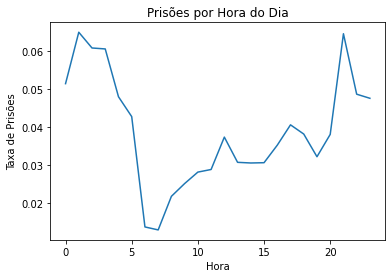

In [21]:
# Importando matplotlib.pyplot
import matplotlib.pyplot as plt

# Criando um gráfico de linha com a variável 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Adicionando os rótulos do eixo x e y e o título do gráfico
plt.xlabel('Hora')
plt.ylabel('Taxa de Prisões')
plt.title('Prisões por Hora do Dia')

# Display the plot
plt.show()

#### 3.3 Paradas de Trânsito Relacionadas à Drogas

As paradas de trânsito relacionadas às drogas estão aumentando? Em uma pequena parte das paradas de trânsito, drogas são encontradas no veículo durante uma busca. Estamos avaliando se essas interrupções relacionadas à tráfico de drogas estão se tornando mais comuns com o tempo.

A coluna booleana `drug_related_stop` indica se drogas foram encontrados durante uma determinada parada. Vamos calcular então a taxa anual de drogas encontradas reamostrando esta coluna e, em seguida, usaremos um gráfico de linha para visualizar como a taxa mudou ao longo do tempo.

In [22]:
# Calculando a taxa anual de paradas relacionadas ao uso de drogas
print(ri['drugs_related_stop'].resample('A').mean())

# Salvando a taxa anual de interceptações de drogas na variável 'annual_drug_rate'
annual_drug_rate = ri['drugs_related_stop'].resample('A').mean()

stop_datetime
2005-12-31    0.006501
2006-12-31    0.007258
2007-12-31    0.007970
2008-12-31    0.007505
2009-12-31    0.009889
2010-12-31    0.010081
2011-12-31    0.009731
2012-12-31    0.009921
2013-12-31    0.013094
2014-12-31    0.013826
2015-12-31    0.012266
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


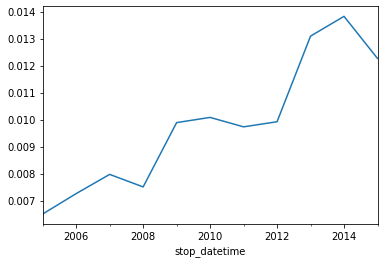

In [23]:
# Criando um gráfico de linha mostrando a taxa anual de apreensão de drogas
annual_drug_rate.plot()
plt.show()

#### 3.3 Comparação Entre a Taxa de Busca e a Taxa de Drogas Encontradas

Como notado anteriormente, a taxa anual de paradas relacionadas à drogas aumentou significativamente entre 2005 e 2015. Esta taxa pode estar relacionada com a taxa de buscas de veículos também estar aumentando, o que teria levado a um aumento nas paradas relacionadas a drogas, mesmo que mais os motoristas não carregavam drogas.

Vamos testar essa hipótese calculando a taxa de busca anual e, em seguida, comparando-a com a taxa anual de apreensão de drogas. Se a hipótese for verdadeira, ficaráá claro que ambas as taxas aumentam com o tempo.

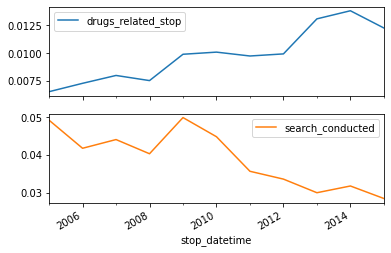

In [24]:
# Calculando e salvando a taxa anual de busca
annual_search_rate = ri['search_conducted'].resample('A').mean()

# Concatenando 'annual_drug_rate' e 'annual_search_rate'
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')

# Criando subplots para a variável 'annual'
annual.plot(subplots=True)

plt.show()

Fica claro então que a hipótese não é verdadeira, uma vez que a taxa anual de buscas tem diminuído bruscamente, enquanto a taxa anual de apreensão de drogas tem aumentado, simbolizando que o tráfico de drogas realmente aumentou durante os anos.

#### 3.4 Violações Mais Frequentes por Distrito

Quais violações são mais detectadas em cada distrito? O estado de Rhode Island está dividido em seis distritos policiais, também conhecidos como zonas. Como as zonas se comparam em termos de quais violações são detectadas pela polícia?

Para fazer esta análise, criaremos uma tabela de frequência para determinar quantas violações de cada tipo ocorreram em cada uma das seis zonas. Em seguida, filtraremos a tabela para focar nas zonas "K", que serão examinadas com mais detalhes adiante.

In [25]:
# Criando uma tabela de frequência de distritos e violações
print(pd.crosstab(ri['district'], ri['violation']))

print("\n")

# Salvando a tabela de frequências na variável 'all_zones'
all_zones = pd.crosstab(ri['district'], ri['violation'])

# Selecionando as linhas 'Zone K1' até 'Zone K3'
print(all_zones.loc['Zone K1':'Zone K3'])

# Salvando a tabela contendo apenas as K zonas na variável 'k_zones'
k_zones = all_zones.loc['Zone K1':'Zone K3']

violation  Equipment  Moving violation  ...  Seat belt  Speeding
district                                ...                     
Zone K1          672              1254  ...          0      5960
Zone K2         2061              2962  ...        481     10448
Zone K3         2302              2898  ...        638     12322
Zone X1          296               671  ...         74      1119
Zone X3         2049              3086  ...        820      8779
Zone X4         3541              5353  ...        843      9795

[6 rows x 6 columns]


violation  Equipment  Moving violation  ...  Seat belt  Speeding
district                                ...                     
Zone K1          672              1254  ...          0      5960
Zone K2         2061              2962  ...        481     10448
Zone K3         2302              2898  ...        638     12322

[3 rows x 6 columns]


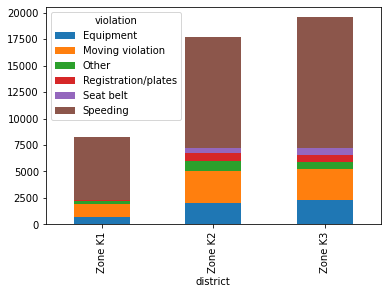

In [26]:
# Criando um gráfico de barra com as 'k_zones'
k_zones.plot(kind='bar', stacked=True)

plt.show()

#### 3.5 Taxa de Infração por Buscas Realizadas

Neste caso, queremos saber quantas buscas foram realizadas para que se encontrasse cada tipo de violação. Isto é, queremos saber a taxa de infrações com relação ao número de buscas realizadas em veículos.

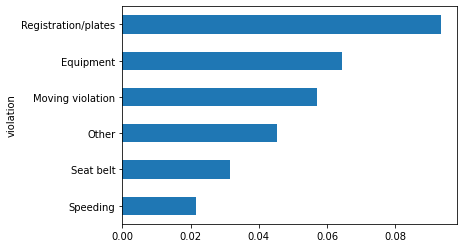

In [27]:
# Criando a taxa de busca
search_rate = ri.groupby('violation')['search_conducted'].mean()

# Plotando a taxa de busca
search_rate.sort_values().plot(kind='barh')

#### 3.6 Duração das Paradas de Trânsito

Iremos neste caso converter as durações de paradas de trânsito em números mais simples de se analisar. No conjunto de dados de paradas de trânsito, a coluna `stop_duration` informa aproximadamente por quanto tempo o motorista foi detido pelo policial. Infelizmente, as durações são armazenadas como strings, como '0-15 Min'. Podemos tornar esses dados mais fáceis de analisar.

Convertendo:
'0-15 Min' a 8
'16 -30 Min 'a 23
'30 + Min 'a 45


In [28]:
# Print the unique values in 'stop_duration'
print(ri['stop_duration'].unique())

# Create a dictionary that maps strings to integers
mapping = {'0-15 Min' : 8, '16-30 Min' : 23, '30+ Min' : 45}

# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri['stop_duration'].map(mapping)

# Print the unique values in 'stop_minutes'
print(ri['stop_minutes'].unique())

['0-15 Min' '16-30 Min' '30+ Min']
[ 8 23 45]


Agora iremos então evidenciar através de um gráfico quanto tempo pode ser necessário ficar em uma parada de trânsito. Neste caso, iremos fornecer a  visualização do tempo médio de parada dos motoristas para cada tipo de violação. Em vez de usar a coluna `violation` usamos a coluna `violação_raw`, pois contém descrições mais detalhadas das violações.

violation_raw
APB                                 17.967033
Call for Service                    22.124371
Equipment/Inspection Violation      11.445655
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581562
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64




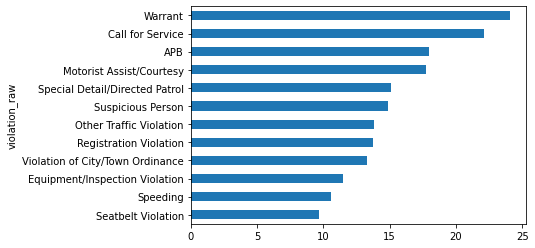

In [29]:
# Calculando a média de 'stop_minutes' para cada valor na coluna 'violation_raw'
print(ri.groupby('violation_raw')['stop_minutes'].mean())

print("\n")

# Salvando o resultado em uma variável chamada stop_lenght
stop_length = ri.groupby('violation_raw')['stop_minutes'].mean()

# Ordenando a variável 'stop_length' e fornecendo o gráfico de barra horizontal dos valores apresentados
stop_length.sort_values().plot(kind='barh')

plt.show()

Fica evidente então que algumas infrações realmente costumam demorar um tempo maior para avaliação do policial, enquanto outras o motorista é dispensado com certa rapidez.